# Weight evaluations of all 5 base learners using sea_big dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
import time

In [2]:
df = pd.read_csv("./path/sea_big.csv")
df

,attrib1,attrib2,attrib3,class
0,8.627911,1.219396,5.979280,1
1,6.982727,5.653128,4.540896,1
2,6.584307,2.010883,9.977625,0
3,2.561163,4.702918,3.653717,0
4,5.750300,0.976540,1.972562,0
...,...,...,...,...
99995,3.234262,5.982005,5.972147,0
99996,4.663404,9.635058,8.954203,1
99997,4.912471,2.882428,7.923671,0
99998,0.028230,4.459141,8.849129,0


In [3]:
X = df.drop(['class'],axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, shuffle=False,random_state = 0)

In [4]:
from river import metrics
from river import stream
from river import tree,neighbors,naive_bayes, ensemble, linear_model
from river.drift import EDDM, DDM, ADWIN, HDDM_A, HDDM_W

In [5]:
def adaptive_learning(model, X_train, y_train, X_test, y_test):
    metric = metrics.Accuracy() # Use accuracy as the metric
    i = 0 # count the number of evaluated data points
    t = [] # record the number of evaluated data points
    m = [] # record the real-time accuracy
    yt = [] # record all the true labels of the test set
    yp = [] # record all the predicted labels of the test set

    # Learn the training set
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        model.learn_one(xi1,yi1) 

    # Predict the test set
    for xi, yi in stream.iter_pandas(X_test, y_test):
        y_pred= model.predict_one(xi)  # Predict the test sample
        model.learn_one(xi,yi) # Learn the test sample
        metric = metric.update(yi, y_pred) # Update the real-time accuracy
        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        i = i+1
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

In [6]:
def acc_fig(t, m, name):
    plt.rcParams.update({'font.size': 15})
    plt.figure(1,figsize=(10,6)) 
    sns.set_style("darkgrid")
    plt.clf() 
    plt.plot(t,m,'-b',label='Avg Accuracy: %.2f%%'%(m[-1]))

    plt.legend(loc='upper right')
    plt.title(name+' sea_big dataset', fontsize=15)
    plt.xlabel('Number of samples')
    plt.ylabel('Accuracy (%)')

    plt.draw()

# Base learners

Accuracy: 88.67%
Precision: 88.84%
Recall: 91.88%
F1-score: 90.34%
Wall time: 2min 32s


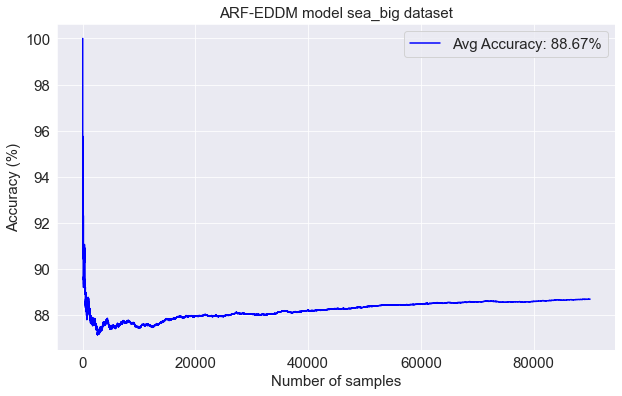

In [7]:
%%time
# Use the Adaptive Random Forest (ARF) model with EDDM drift detector
name1 = "ARF-EDDM model"
model1 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = EDDM()) # Define the model
SEED = np.random.seed(45)
t, m1 = adaptive_learning(model1, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m1, name1) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 88.61%
Precision: 88.78%
Recall: 91.84%
F1-score: 90.28%
Wall time: 2min 17s


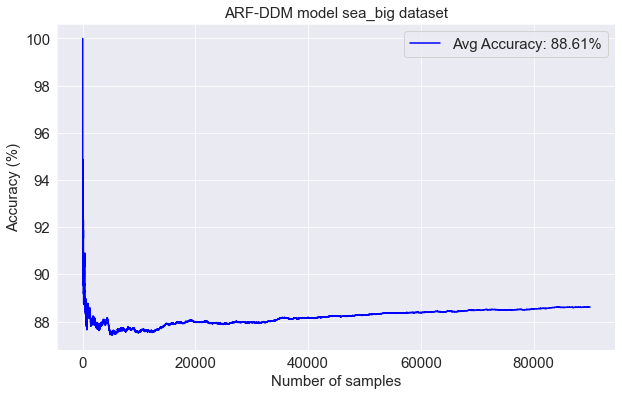

In [8]:
%%time
# Use the Adaptive Random Forest (ARF) model with DDM drift detector
name2 = "ARF-DDM model"
model2 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = DDM()) # Define the model
SEED = np.random.seed(45)
t, m2 = adaptive_learning(model2, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m2, name2) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 88.32%
Precision: 88.52%
Recall: 91.61%
F1-score: 90.03999999999999%
Wall time: 1min 23s


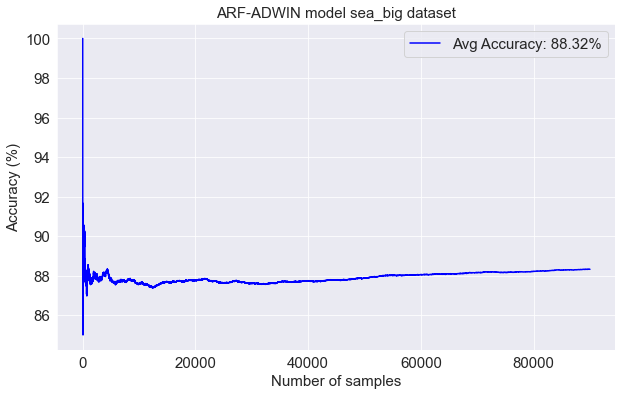

In [9]:
%%time
# Use the Adaptive Random Forest (ARF) model with ADWIN drift detector
name3 = "ARF-ADWIN model"
model3 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN()) # Define the model
SEED = np.random.seed(45)
t, m3 = adaptive_learning(model3, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m3, name3) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 88.7%
Precision: 88.82%
Recall: 91.96%
F1-score: 90.36%
Wall time: 2min 1s


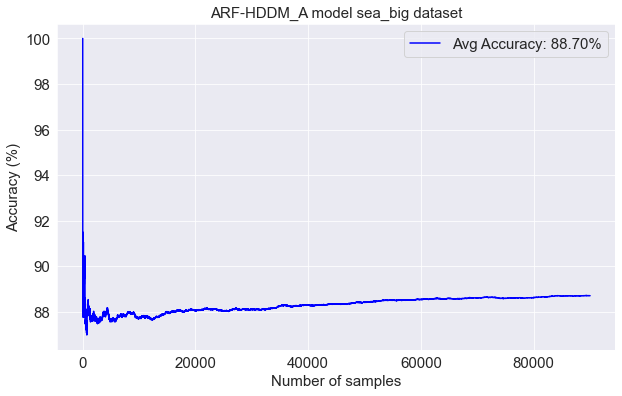

In [10]:
%%time
# Use the Adaptive Random Forest (ARF) model with HDDM_A drift detector
name4 = "ARF-HDDM_A model"
model4 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = HDDM_A()) # Define the model
SEED = np.random.seed(45)
t, m4 = adaptive_learning(model4, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m4, name4) # Draw the figure of how the real-time accuracy changes with the number of samples

Accuracy: 88.79%
Precision: 88.91%
Recall: 92.03%
F1-score: 90.44%
Wall time: 2min 8s


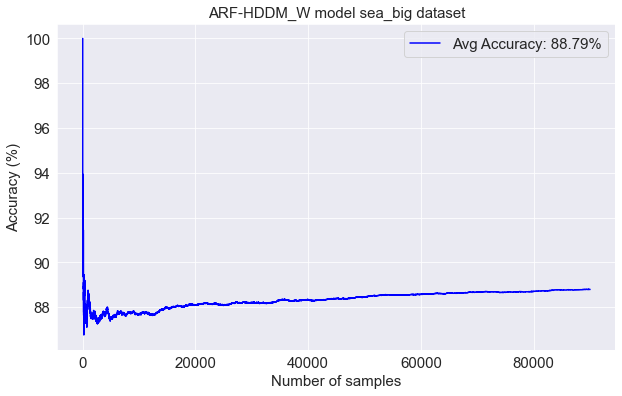

In [11]:
%%time
# Use the Adaptive Random Forest (ARF) model with HDDM_W drift detector
name5 = "ARF-HDDM_W model"
model5 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = HDDM_W()) # Define the model
SEED = np.random.seed(45)
t, m5 = adaptive_learning(model5, X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m5, name5) # Draw the figure of how the real-time accuracy changes with the number of samples

In [12]:
w1l=[]
w2l=[]
w3l=[]
w4l=[]
w5l=[]
def EWDAEF(X_train, y_train, X_test, y_test):
    # Record the real-time accuracy of ODDM and 5 base learners
    metric = metrics.Accuracy()
    metric1 = metrics.Accuracy()
    metric2 = metrics.Accuracy()
    metric3 = metrics.Accuracy()
    metric4 = metrics.Accuracy()
    metric5 = metrics.Accuracy()

    i=0
    t = []
    m = []
    m1 = []
    m2 = []
    m3 = []
    m4 = []
    m5 = []
    yt = []
    yp = []
    
    hat1 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = EDDM()) # ARF EDDM
    hat2 = ensemble.AdaptiveRandomForestClassifier(n_models= 3, drift_detector=DDM(),warning_detector=DDM()) # ARF-DDM
    hat3 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = ADWIN())  #ARF ADWIN
    hat4 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = HDDM_A()) # ARF HDDM_A
    hat5 = ensemble.AdaptiveRandomForestClassifier(n_models = 3, drift_detector = HDDM_W()) # ARF HDDM_W
    
    for xi1, yi1 in stream.iter_pandas(X_train, y_train):
        hat1.learn_one(xi1,yi1)
        hat2.learn_one(xi1,yi1)
        hat3.learn_one(xi1,yi1)
        hat4.learn_one(xi1,yi1)
        hat5.learn_one(xi1,yi1)
        
    for xi, yi in stream.iter_pandas(X_test, y_test):
        # The five base learner predict the labels
        y_pred1= hat1.predict_one(xi) 
        y_prob1= hat1.predict_proba_one(xi) 
        hat1.learn_one(xi,yi)

        y_pred2= hat2.predict_one(xi) 
        y_prob2= hat2.predict_proba_one(xi)
        hat2.learn_one(xi,yi)

        y_pred3= hat3.predict_one(xi) 
        y_prob3= hat3.predict_proba_one(xi)
        hat3.learn_one(xi,yi)

        y_pred4= hat4.predict_one(xi) 
        y_prob4= hat4.predict_proba_one(xi)
        hat4.learn_one(xi,yi)
        
        y_pred5= hat5.predict_one(xi) 
        y_prob5= hat5.predict_proba_one(xi)
        hat5.learn_one(xi,yi)
        
        
        metric1 = metric1.update(yi, y_pred1)
        metric2 = metric2.update(yi, y_pred2)
        metric3 = metric3.update(yi, y_pred3)
        metric4 = metric4.update(yi, y_pred4)
        metric5 = metric5.update(yi, y_pred5)
        
        
        e1 = 1-metric1.get()
        e2 = 1-metric2.get()
        e3 = 1-metric3.get()
        e4 = 1-metric4.get()
        e5 = 1-metric5.get()
        
        
        ep = 0.001 # The epsilon used to avoid dividing by 0
        # Calculate the weight of each base learner by the reciprocal of its real-time error rate
        ea = 1/(e1+ep)+1/(e2+ep)+1/(e3+ep)+1/(e4+ep)+1/(e5+ep)
        w1 = 1/(e1+ep)/ea
        w2 = 1/(e2+ep)/ea
        w3 = 1/(e3+ep)/ea
        w4 = 1/(e4+ep)/ea
        w5 = 1/(e5+ep)/ea
        
        w1l.append(w1)
        w2l.append(w2)
        w3l.append(w3)
        w4l.append(w4)
        w5l.append(w5)
        
        
        if  y_pred1 == 1:
            ypro10=1-y_prob1[1]
            ypro11=y_prob1[1]
        else:
            ypro10=y_prob1[0]
            ypro11=1-y_prob1[0]
        if  y_pred2 == 1:
            ypro20=1-y_prob2[1]
            ypro21=y_prob2[1]
        else:
            ypro20=y_prob2[0]
            ypro21=1-y_prob2[0]
        if  y_pred3 == 1:
            ypro30=1-y_prob3[1]
            ypro31=y_prob3[1]
        else:
            ypro30=y_prob3[0]
            ypro31=1-y_prob3[0]
        if  y_pred4 == 1:
            ypro40=1-y_prob4[1]
            ypro41=y_prob4[1]
        else:
            ypro40=y_prob4[0]
            ypro41=1-y_prob4[0]
        if  y_pred5 == 1:
            ypro50=1-y_prob5[1]
            ypro51=y_prob5[1]
        else:
            ypro50=y_prob5[0]
            ypro51=1-y_prob5[0]
            
        
        y_prob_0 = w1*ypro10+w2*ypro20+w3*ypro30+w4*ypro40+w5*ypro50
        y_prob_1 = w1*ypro11+w2*ypro21+w3*ypro31+w4*ypro41+w5*ypro51

        if (y_prob_0>y_prob_1):
            y_pred = 0
            y_prob = y_prob_0
        else:
            y_pred = 1
            y_prob = y_prob_1
            
            
        metric = metric.update(yi, y_pred)

        t.append(i)
        m.append(metric.get()*100)
        yt.append(yi)
        yp.append(y_pred)
        
        i=i+1
    
    print("Accuracy: "+str(round(accuracy_score(yt,yp),4)*100)+"%")
    print("Precision: "+str(round(precision_score(yt,yp),4)*100)+"%")
    print("Recall: "+str(round(recall_score(yt,yp),4)*100)+"%")
    print("F1-score: "+str(round(f1_score(yt,yp),4)*100)+"%")
    return t, m

Accuracy: 89.45%
Precision: 89.39%
Recall: 92.69%
F1-score: 91.01%
Wall time: 10min 32s


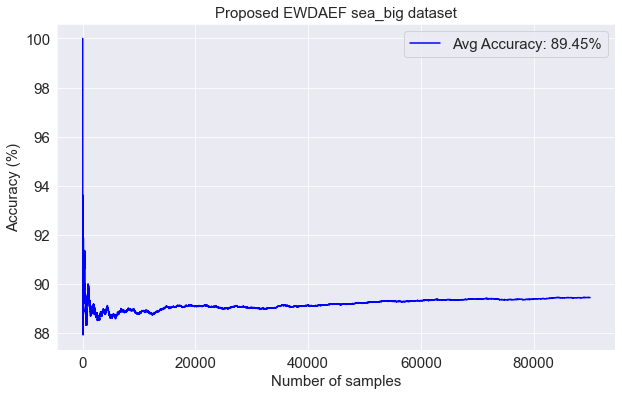

In [13]:
%%time
name = "Proposed EWDAEF"
SEED = np.random.seed(45)
t, m = EWDAEF(X_train, y_train, X_test, y_test) # Learn the model on the dataset
acc_fig(t, m, name) # Draw the figure of how the real-time accuracy changes with the number of samples

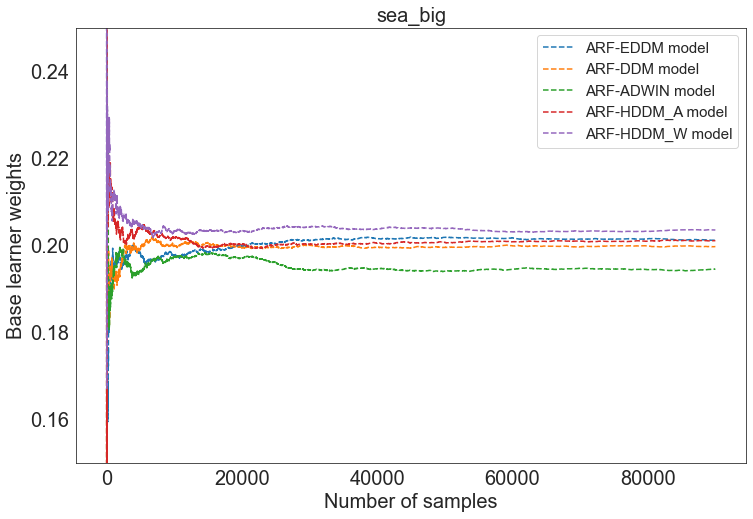

In [15]:
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(12,8)) 
sns.set_style("white")
plt.clf() 

# Plot the weight change of each learner
plt.plot(t, w1l, linestyle='dashed', label=name1+'')
plt.plot(t, w2l, linestyle='dashed', label=name2+'')
plt.plot(t, w3l, linestyle='dashed', label=name3+'')
plt.plot(t, w4l, linestyle='dashed', label=name4+'')
plt.plot(t, w5l, linestyle='dashed', label=name5+'')
plt.ylim(bottom=.15,top=.25)
#plt.ylim(bottom=min(min(w1l),min(w2l),min(w3l),min(w4l),min(w5l)),top=max(max(w1l),max(w2l),max(w3l),max(w4l),max(w5l)))

        
plt.legend(loc='best',fontsize=15)
plt.title('sea_big', fontsize=20)
plt.xlabel('Number of samples')
plt.ylabel('Base learner weights')

plt.draw()
plt.savefig("FigDrift-909.png")